Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

Define layer name

In [3]:
folder_name = 'label_10'

Label 04

In [4]:
cols = list(pd.read_csv(f"{folder_name}/train.csv", nrows=1))
train_data = pd.read_csv(f"{folder_name}/train.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_2"]])
train_data.shape

(28520, 769)

Handling missing values

In [5]:
train_data = train_data.dropna()
print(train_data.shape)
train_data.head()

(28520, 769)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_4
0,-0.027083,0.072947,-0.093659,0.053418,-0.085516,-0.102610,-0.021217,0.016162,-0.184269,0.110335,...,0.067435,-0.019936,-0.273023,-0.183643,0.091299,-0.037097,0.042607,-0.034361,-0.013748,6
1,0.070195,0.228641,-0.132860,-0.077761,-0.054993,-0.210365,0.127747,-0.132385,-0.161366,0.172764,...,0.020278,-0.022319,-0.295371,-0.123668,0.029626,-0.027345,0.055223,-0.179725,0.136841,6
2,0.164312,0.052808,-0.058510,0.104724,-0.025886,-0.101427,-0.047177,0.091298,-0.094569,0.088062,...,-0.010740,0.064840,-0.310890,0.075410,0.070125,0.043022,0.012972,-0.028920,0.096725,6
3,0.029730,0.113737,0.061113,-0.099329,-0.111600,-0.245942,0.086520,0.071996,0.028319,0.207910,...,-0.005819,-0.040344,-0.170511,-0.062511,-0.226912,-0.046011,0.011282,-0.095167,0.039979,6
4,0.031364,0.142409,-0.160743,-0.076594,-0.062412,-0.264732,0.079197,0.026060,-0.217023,0.084656,...,0.008716,0.021783,-0.232735,-0.193882,0.107297,-0.042355,0.046763,-0.192469,0.006463,6


numbers of missing values neglegible 

Import test data set

In [6]:
cols = list(pd.read_csv(f"{folder_name}/valid.csv", nrows=1))
valid_data = pd.read_csv(f"{folder_name}/valid.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_2"]])
valid_data.shape

(750, 769)

Handling missing values

In [7]:
valid_data = valid_data.dropna()
valid_data.shape

(750, 769)

In [8]:
#features
X_train = train_data.iloc[:,:-1]
Y_train = train_data.iloc[:,-1]
X_valid = valid_data.iloc[:,:-1]
Y_valid = valid_data.iloc[:,-1]

Standarization

In [9]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

X_train_scaler = robust_scaler.transform(X_train)
X_valid_scaler = robust_scaler.transform(X_valid)

Dimensionality reduction

In [10]:
pca = PCA(0.98)
pca = pca.fit(X_train_scaler)

X_train_pca = pca.transform(X_train_scaler)
X_valid_pca = pca.transform(X_valid_scaler)
X_train_pca.shape

(28520, 424)

oversampling and undersampling

<Axes: title={'center': 'Count of Label_2'}>

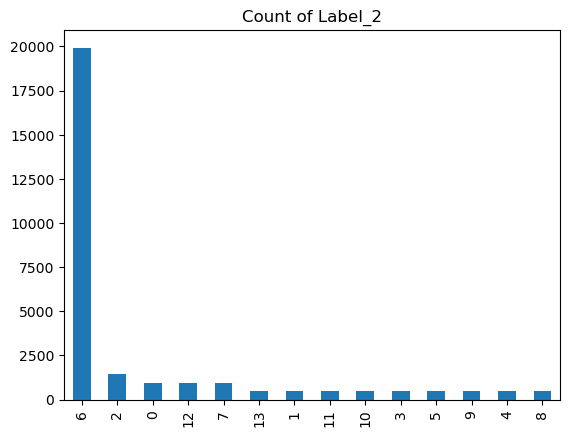

In [11]:
train_data['label_4'].value_counts().plot(kind='bar',title='Count of Label_2')

(279132, 424)


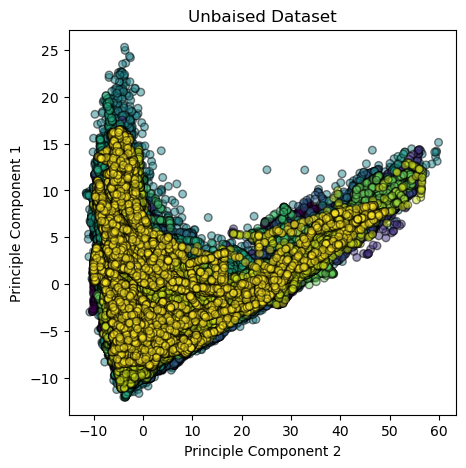

In [12]:
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smt, Y_train_smt = smotetomek.fit_resample(X_train_pca, Y_train)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_smt, Y_train_smt, ax, title='Unbaised Dataset')
print(X_train_smt.shape)

Using SVC

In [13]:
from sklearn.svm import SVC

In [14]:
svc_init = SVC()
svc_init.fit(X_train_scaler,Y_train)
svc_predicted = svc_init.predict(X_valid_scaler)
accuracy_score(Y_valid,svc_predicted)

0.96

After feature engineering

In [15]:
svc = SVC()
svc.fit(X_train_smt, Y_train_smt)
svc_predicted = svc.predict(X_valid_pca)
accuracy_score(Y_valid,svc_predicted)

0.98

Hyper Parameter tuning without dimentionality reduction

In [16]:
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train_pca, Y_train)

# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [17]:
# grid.fit(X_train_smt, Y_train_smt)
# grid_predictions = grid.predict(X_valid_pca)
  
# # print classification report
# accuracy_score(Y_valid, grid_predictions)

In [18]:
cols = list(pd.read_csv(f"{folder_name}/test.csv", nrows=1))
test_data = pd.read_csv(f"{folder_name}/test.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_2"]])
#features
X_test = test_data.iloc[:,1:]
X_test.head()

X_test_scaler = robust_scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

grid_predictions = svc.predict(X_test_pca)
grid_predictions

array([ 2,  8,  6,  6,  6,  6,  6,  6,  6,  2,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  0,  6,  2,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  8,  4,  3,  6,  6,  6,  1,  6,  6,  6,  0,  1,
        6,  6,  7,  0,  6,  6,  5,  6,  6,  6,  3,  6,  2,  6,  8,  6,  6,
        6, 12,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5, 12,  6,  6,  4,
        6, 12,  4,  6,  6,  6,  6,  6,  0,  6,  6,  7,  6,  6,  0,  4,  2,
        6,  6,  6,  6,  6,  6, 12,  6,  6,  7,  6,  6,  6,  6,  6,  6,  0,
        6,  4,  6,  6,  6, 12,  9,  6, 11,  5,  6,  6,  6,  6,  6,  6,  1,
        0,  6,  6,  7,  6,  6,  6,  7,  0,  6,  6,  6,  6,  6,  0,  7,  3,
        6,  6, 10,  4,  6,  9,  6,  6,  8,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  2,  6,  5, 10,  6,  6,  8,  6,  6,  7,  6,  6,
        6,  6,  2,  6,  5,  6,  7,  6,  6,  6, 12,  6,  6,  6, 13,  8,  6,
        6, 11,  6,  1,  6,  2,  4,  6,  6,  6,  6,  6,  6,  3, 12,  6,  6,
        6,  6,  7,  6,  6

In [19]:
size = grid_predictions.size
index = []
for i in range(size):
    index.append(i+1)
data = {
    'ID': index,
    'label_4': grid_predictions
}
df = pd.DataFrame(data)
df.to_csv('10-4.csv', index=False)